# Растровые изображения и базис Хаара
## Введение

С точки зрения линейной алгебры, пространство матриц размером M x N эквивалентно пространству векторов $R^{MN}$, то есть всегда можно "развернуть" матрицу (например, по столбцам) так, что получится вектор: 

$$
    \mathbf{a} = \mathbf{A}[:] = [
        \begin{array}{ccccccc}
            a_{0,0} & \dots & a_{M-1,0} & a_{0,1} & \dots & a_{M-1,1} & \ldots & a_{0, N-1} & \dots & a_{M-1,N-1}
        \end{array}]^T
$$

При этом скалярное произведение в пространстве $R^{MN}$ определяется как:

$$
\langle \mathbf{A}, \mathbf{B} \rangle = \sum_{m=0}^{M-1} \sum_{n=0}^{N-1} a_{m,n} b_{m, n}
$$

(рассматриваем матрицы действительных чисел, поэтому в формуле нет комплексного сопряжения).


Упрощённо, любое цифровое (! $\textit{растровое}$) изображение представляет собой матрицу, в ячейках которой хранятся цвета каждого пикселя. Если речь идет о чёрно-белых изображениях, то вместо цвета в каждую ячейку помещают значения яркости из отрезка [0, 1]. Но с дробями работать неудобно, поэтому часто значения яркости берут целыми из диапазона от 0 до 255 (при этом 0 соответствует чёрному цвету, 255 — белому). Тогда каждое значение будет занимать ровно 1 байт (8 бит). 

Зная это, можно сгенерировать простейшее цифровое изображение - шахматную доску $N\times M$. В среде Python это будет выглядеть так:

In [1]:
#стандартная преамбула в Python
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import IPython
from IPython.display import Image
import math

In [2]:
# включаем черно-белую гамму
plt.gray();

<Figure size 432x288 with 0 Axes>

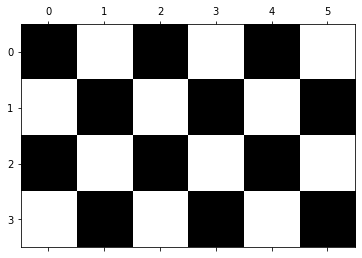

In [5]:
# создаем шахматную доску
N = 4
M = 6
img = np.zeros((N, M))
for n in range(0, N):
    for m in range(0, M):
        if (n & 0x1) ^ (m & 0x1):
            img[n, m] = 255

# выводим полученную матрицу в виде изображения
plt.matshow(img); 

## Реальные изображения

Аналогично, используя оболочку IPython, можно загрузить любое цифровое изображение и преобразовать его в матрицу (двумерный массив):

In [23]:
# конвертируем изображение в матрицу
img = np.array(plt.imread('jet_64x64.jpg'), dtype=int)
# выводим размер матрицы
img_X = len(img[:]); # число строк
img_Y = len(img[0,:]); # число столбцов
np.shape(img)

(64, 64)

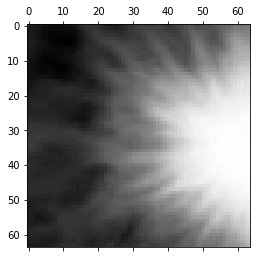

In [21]:
# выводим само изабражение
plt.matshow(img);

Изображение имеет разрешение $64\times64$ пк. Выведем значение какого-нибудь столбца - вектора $64\times1$:

In [11]:
img[:,15]

array([74, 66, 57, 53, 53, 52, 53, 56, 61, 60, 60, 61, 58, 54, 54, 56, 60,
       61, 66, 69, 69, 69, 64, 58, 55, 54, 49, 49, 56, 63, 71, 82, 85, 85,
       83, 79, 78, 79, 78, 75, 75, 70, 68, 69, 67, 65, 65, 64, 62, 63, 64,
       68, 76, 82, 81, 80, 77, 78, 77, 74, 73, 73, 72, 70])

## Канонический базис

Каноническим базисом в пространстве матриц размером $M \times N$ (пространстве векторов $R^{MN}$)  будет т.н. набор «дельта» матриц $e(N\times M)$, в которых лишь один элемент равен 1, а остальные - нули.

In [12]:
# создаем функцию, строящую "дельта"-матрицы ращмером NxM
def canonical(n, M, N):
    e = np.zeros((M, N))
    e[(n % M), int(n / M)] = 1
    return e

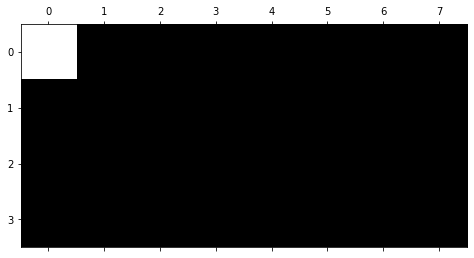

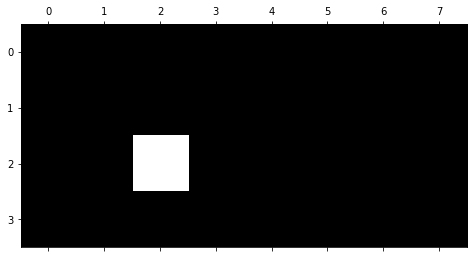

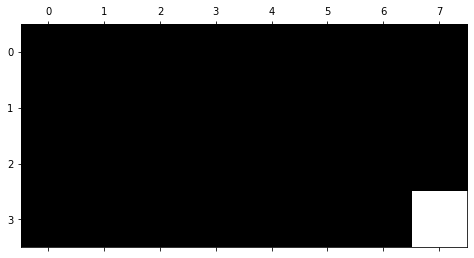

In [19]:
# зададим размер пространства 
N = 4
M = 8
# выведем несколько базисных векторов в виде изображения
plt.matshow(canonical (0,N,M))
plt.matshow(canonical (10,N,M))
plt.matshow(canonical (31,N,M))

## Хранение и передача изображений

Даже небольшие изображения требуют много памяти для хранения. Так, если информация о яркости каждого пикселя занимает 1 байт, то изображение одного кадра в формате FullHD (1920$\times$1080 пк) требует уже почти 2 мегабайта памяти. Тогда для хранения полуторачасового фильма необходимо уже более 200 гигабайт (!).

В этой связи возникает необходимость сжатия изображений. В идеале, сжатие предполагает кодирование изображений так, чтобы они занимали как можно меньший объем памяти, а во время просмотра происходило декодирование записанных в память данных, чтобы получался исходный кадр. На сегодняшний день изобретено множество алгоритмов сжатия (об этом можно судить по количеству форматов, поддерживаемых современными архиваторами: ZIP, 7Z, RAR, GZIP, BZ2 и пр.). 

К сожалению, теоретический предел сжатия данных для изображений не так уж и велик. Это происходит из-за того, что в изображениях из реального мира (например, фотографиях) значения яркости редко бывают одинаковыми даже у соседних пикселей. Эти колебания яркости могут быть незаметны человеческому глазу, но при сжатии их все равно приходится учитывать. В то же время, алгоритмы сжатия «любят», когда в данных есть закономерность. Так, последовательность из ста нулей кодируется лишь парой чисел (100,0). Однако если в середине последовательности окажется единица, для ее кодирования потребуется уже больший объем информации.

Другая проблема - восстановление данных на случай потерь в канале передачи. Допустим, нам нужно переслать наше экспериментальное изображение размером 64х64 пк. Напрямую, это эквивалентно пересылке 64х64=4096 коэффициентов разложения изображения по каноническому базису. Допустим, из-за обрыва в канале передачи удалось отправить только половину информации. Это можно смоделировать следующим образом:


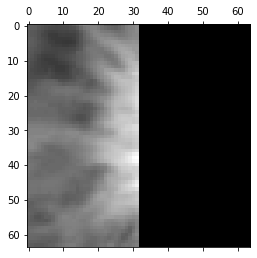

In [25]:
# преобразуем матрицу изображения в вектор по столбцам:
ar_img = np.ravel(img, order="F")
# удаляем половину данных:
ar_img[int(len(ar_img)/2):] = 0
# «пересобираем» матрицу и выводим изображение:
re_img = np.reshape(ar_img, (img_X, img_Y), order="F")
plt.matshow(re_img);

## Преобразование Хаара

Итак, стоит задача: преобразовать изображение так, чтобы оно хорошо сжималось классическими алгоритмами и было более устойчивым к потерям в канале передачи. Для этого можно использовать разложение не по каноническому базису, а по ортогональному $\textit{базису Хаара}$.

Вспомним, что яркость соседних пикселей на «реальных» изображениях обычно отличается на небольшую величину, т.е. резкие перепады яркости встречаются редко и лишь на малой части изображения.

Рассмотрим фрагмент выведенной строки нашего изображения:

.., 66, 57, 53, 53, 52, 53, 56, 61, ..

Разобьем данную последовательность на пары и каждой паре элементов поставим в соответствие два числа - их полусумму и полуразность. Тогда на выходе получим две последовательности (61.5, 53, 52.5, 58.5) и (4.5, 0.0, -0.5, -2.5). Повторяя операцию применительно к первой последовательности, получим (57.25, 55.5) и (4.25, -3.0). Таким образом, для каждого элемента исходного сигнала на выходе мы получаем два сигнала, один из которых является огрубленной версией входного сигнала, а второй содержит детализирующую информацию, необходимую для восстановления исходного сигнала. Этот принцип - выделение информации при различных уровнях детализации - лежит в основе $\textit{вейвлет-преобразования сигналов}$.

Не углубляясь в математику, попробуем сгенерировать ортогональный базис Хаара для квадратных матриц, число строк и столбцов в которых является степенью 2. Для этого сначала генерируем 1-мерный вектор Хаара, а затем на его основе построим базисные матрицы (размером 8х8) в виде векторного произведения всех возможных 1-мерных векторов.



Подробнее про вейвлет Хаара и вейвлет-преобразования можно найти в литературе: 

1) Яковлев А.Н. Введение в вейвлет-преобразования: Учеб. пособие. – Новосибирск: Изд-во НГТУ, 2003.

2) Уэлстид С. Фракталы и вейвлеты для сжатия изображений в действии. — М.: Триумф, 2003.